In [6]:
import pandas as pd

# Load the Excel file
xlsx_file = 'Cleaned_IPL_Dataset2.xlsx'  # Change this to your actual file name
sheet_name = 0  # You can also use the sheet name, like 'Sheet1'

# Read the Excel sheet into a DataFrame
df = pd.read_excel(xlsx_file, sheet_name=sheet_name)

# Convert to CSV
csv_file = 'Cleaned_IPL_Dataset2.csv'  # Output CSV file name
df.to_csv(csv_file, index=False)

print(f"File converted successfully and saved as '{csv_file}'")


File converted successfully and saved as 'Cleaned_IPL_Dataset2.csv'


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def main():
    # 1. Load the data
    df = pd.read_csv('Cleaned_IPL_Dataset2.csv')  # Change if your file has a different name
    print("Data loaded successfully!\n")
    
    # 2. Quick Data Overview
    print("Data Info:")
    print(df.info())
    print("\nData Head:")
    print(df.head())

    # 3. Basic EDA
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))
    
    # 4. Visualization Example: Distribution of a Column (e.g., favorite_team)
    if 'favorite_team' in df.columns:
        plt.figure(figsize=(8, 4))
        team_counts = df['favorite_team'].value_counts()
        sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')
        plt.title('Favorite Team Distribution')
        plt.xlabel('Team')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig("favorite_team_distribution.png")  # Save figure locally
        plt.show()
    
    # 5. Sentiment Analysis using VADER
    if 'comment' in df.columns:
        analyzer = SentimentIntensityAnalyzer()
        
        def get_vader_score(text):
            if pd.isnull(text):
                return 0
            scores = analyzer.polarity_scores(str(text))
            return scores['compound']
        
        df['vader_score'] = df['comment'].apply(get_vader_score)
        
        def classify_sentiment(score, pos_threshold=0.05, neg_threshold=-0.05):
            if score >= pos_threshold:
                return 'Positive'
            elif score <= neg_threshold:
                return 'Negative'
            else:
                return 'Neutral'
        
        df['sentiment_label'] = df['vader_score'].apply(classify_sentiment)
        
        # Display sentiment distribution
        sentiment_counts = df['sentiment_label'].value_counts()
        print("\nSentiment Distribution:")
        print(sentiment_counts)
        
        plt.figure(figsize=(6, 4))
        sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Blues')
        plt.title('Overall Sentiment Distribution')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.savefig("overall_sentiment_distribution.png")
        plt.show()
        
        # Sentiment by team
        if 'favorite_team' in df.columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x='favorite_team', hue='sentiment_label', palette='Set2')
            plt.title('Sentiment by Favorite Team')
            plt.xlabel('Team')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend(title='Sentiment')
            plt.tight_layout()
            plt.savefig("sentiment_by_favorite_team.png")
            plt.show()
        
        # Save the enriched DataFrame with sentiment labels (optional)
        df.to_csv("ipl_sentiment_with_scores.csv", index=False)
        print("\nEnriched CSV saved as 'ipl_sentiment_with_scores.csv'")
    
    else:
        print("\nNo 'comment' column found for sentiment analysis.")
    
if __name__ == "__main__":
    main()


Data loaded successfully!

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Age Group                                                                                        400 non-null    object
 1   Gender                                                                                           400 non-null    object
 2   Location (Home City)                                                                             400 non-null    object
 3   Favorite IPL Team:                                                                               400 non-null    object
 4   Which IPL team do you dislike the most?                                                          400 n

✅ Data loaded successfully!

  Age Group Gender Location (Home City)   Favorite IPL Team:  \
0     19-25   Male             Varanasi  Chennai Super Kings   
1     19-25   Male              Kolkata         Punjab Kings   
2     19-25   Male               Meerut       Mumbai Indians   
3     19-25   Male              Unknown  Chennai Super Kings   
4     19-25   Male             Srinagar  Chennai Super Kings   

  Which IPL team do you dislike the most?  \
0             Royal Challengers Bengaluru   
1             Royal Challengers Bengaluru   
2                            Punjab Kings   
3                          Delhi Capitals   
4             Royal Challengers Bengaluru   

  How long have you supported this team?  \
0             Since the beginning of IPL   
1             Since the beginning of IPL   
2             Since the beginning of IPL   
3             Since the beginning of IPL   
4             Since the beginning of IPL   

   How emotionally invested are you in IPL? (Scale

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/2778416038.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')


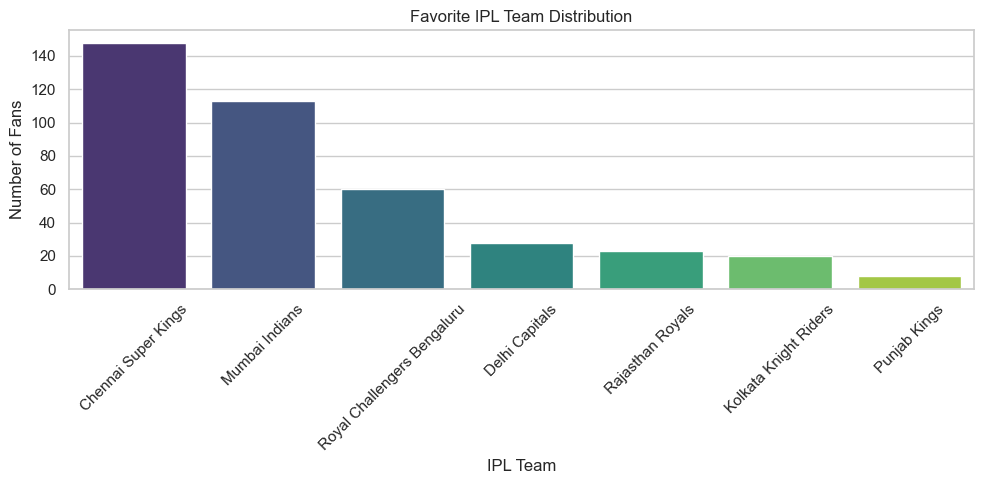

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/2778416038.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disliked_counts.index, y=disliked_counts.values, palette='magma')


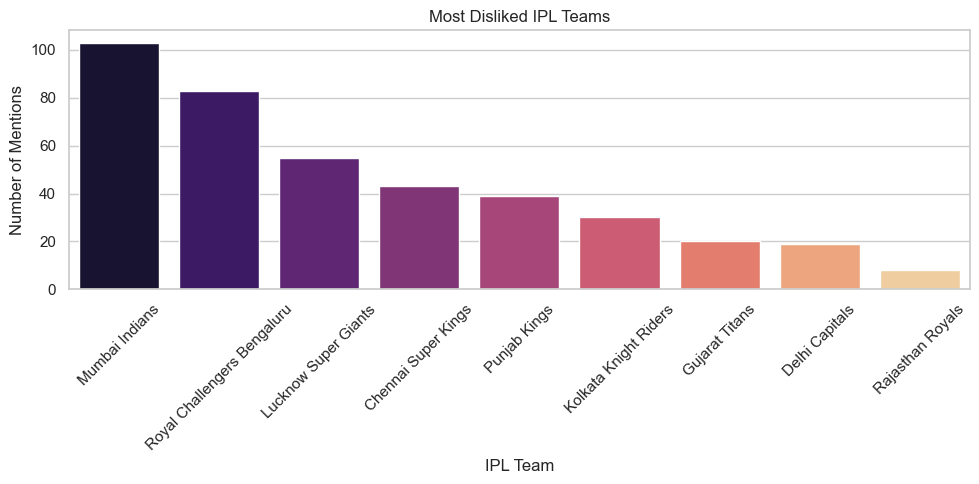

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/2778416038.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='cool')


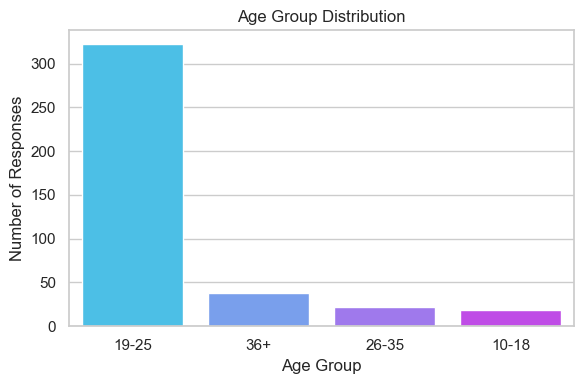

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/2778416038.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="How emotionally invested are you in IPL? (Scale: 1 - Not at all, 5 - Very emotionally invested)", palette="crest")


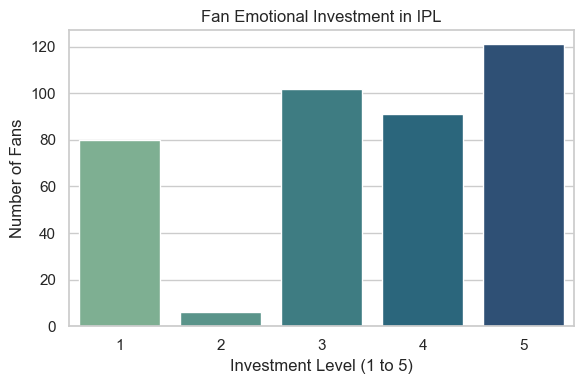

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/2778416038.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")


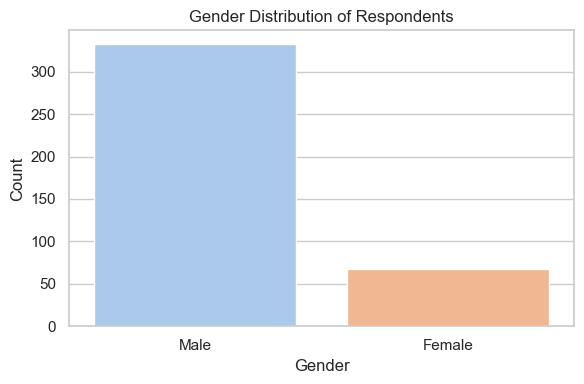

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/2778416038.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reaction_loss.index, y=reaction_loss.values, palette="Reds")


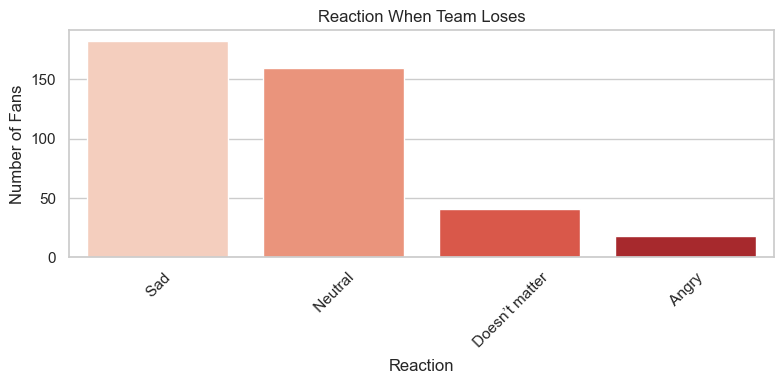

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/2778416038.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reaction_win.index, y=reaction_win.values, palette="Greens")


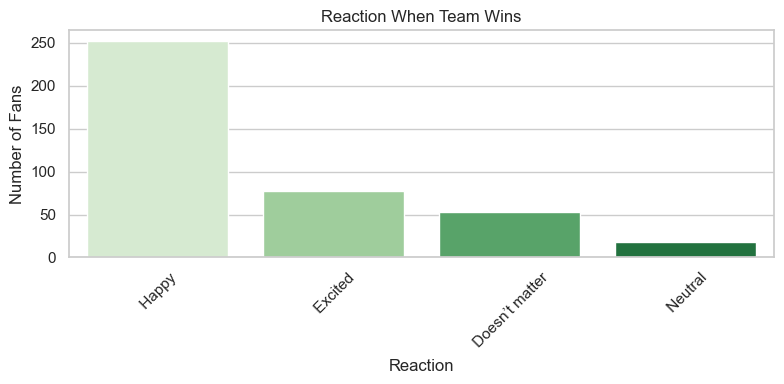

🎉 All EDA visualizations saved and shown successfully!


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load the cleaned Excel file
df = pd.read_excel("Cleaned_IPL_Dataset2.xlsx")

# Check the first few rows
print("✅ Data loaded successfully!\n")
print(df.head())

# ---------- Plot 1: Favorite IPL Team Distribution ----------
plt.figure(figsize=(10, 5))
team_counts = df["Favorite IPL Team:"].value_counts()
sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')
plt.title("Favorite IPL Team Distribution")
plt.xticks(rotation=45)
plt.xlabel("IPL Team")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.savefig("plot_favorite_teams.png")
plt.show()

# ---------- Plot 2: Disliked IPL Team Distribution ----------
plt.figure(figsize=(10, 5))
disliked_counts = df["Which IPL team do you dislike the most?"].value_counts()
sns.barplot(x=disliked_counts.index, y=disliked_counts.values, palette='magma')
plt.title("Most Disliked IPL Teams")
plt.xticks(rotation=45)
plt.xlabel("IPL Team")
plt.ylabel("Number of Mentions")
plt.tight_layout()
plt.savefig("plot_disliked_teams.png")
plt.show()

# ---------- Plot 3: Age Group Distribution ----------
plt.figure(figsize=(6, 4))
age_counts = df["Age Group"].value_counts()
sns.barplot(x=age_counts.index, y=age_counts.values, palette='cool')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Responses")
plt.tight_layout()
plt.savefig("plot_age_distribution.png")
plt.show()

# ---------- Plot 4: Emotional Investment Level ----------
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="How emotionally invested are you in IPL? (Scale: 1 - Not at all, 5 - Very emotionally invested)", palette="crest")
plt.title("Fan Emotional Investment in IPL")
plt.xlabel("Investment Level (1 to 5)")
plt.ylabel("Number of Fans")
plt.tight_layout()
plt.savefig("plot_emotional_investment.png")
plt.show()

# ---------- Plot 5: Gender Distribution ----------
plt.figure(figsize=(6, 4))
gender_counts = df["Gender"].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title("Gender Distribution of Respondents")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_gender_distribution.png")
plt.show()

# ---------- Plot 6: How fans react when their team loses ----------
plt.figure(figsize=(8, 4))
reaction_loss = df["How do you react when your team loses?"].value_counts()
sns.barplot(x=reaction_loss.index, y=reaction_loss.values, palette="Reds")
plt.title("Reaction When Team Loses")
plt.xlabel("Reaction")
plt.ylabel("Number of Fans")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plot_team_loss_reaction.png")
plt.show()

# ---------- Plot 7: How fans react when their team wins ----------
plt.figure(figsize=(8, 4))
reaction_win = df["How do you react when your team wins?"].value_counts()
sns.barplot(x=reaction_win.index, y=reaction_win.values, palette="Greens")
plt.title("Reaction When Team Wins")
plt.xlabel("Reaction")
plt.ylabel("Number of Fans")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plot_team_win_reaction.png")
plt.show()

print("🎉 All EDA visualizations saved and shown successfully!")

  How do you react when your team wins?  \
0                               Excited   
1                                 Happy   
2                                 Happy   
3                                 Happy   
4                                 Happy   

  How do you react when your team loses?  \
0                                    Sad   
1                                    Sad   
2                                Neutral   
3                                Neutral   
4                                    Sad   

   How do you react when your team wins? [Score]  \
0                                         0.3400   
1                                         0.5719   
2                                         0.5719   
3                                         0.5719   
4                                         0.5719   

   How do you react when your team loses? [Score]  \
0                                         -0.4767   
1                                         -0.4767   
2   

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/4258246515.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_col, data=df, palette="Set2")


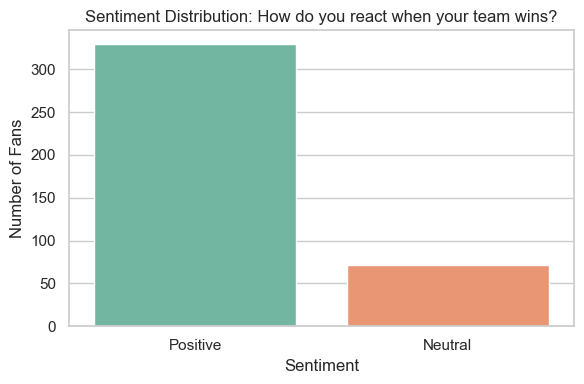

/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/4258246515.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_col, data=df, palette="Set2")


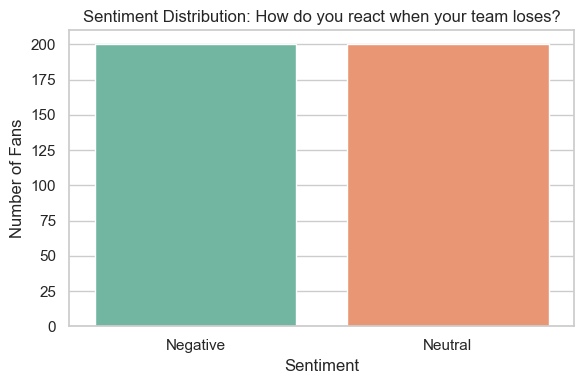


✅ Sentiment labels added and saved to 'ipl_sentiment_with_labels.csv'


In [9]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load your Excel file
df = pd.read_excel("Cleaned_IPL_Dataset2.xlsx")

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply VADER on 2 specific columns (you can add more)
target_columns = [
    "How do you react when your team wins?",
    "How do you react when your team loses?"
]

# Function to get compound score
def get_sentiment_score(text):
    if pd.isnull(text):
        return 0.0
    return analyzer.polarity_scores(str(text))["compound"]

# Function to classify into labels
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment scoring and labeling
for col in target_columns:
    score_col = col + " [Score]"
    label_col = col + " [Sentiment]"

    df[score_col] = df[col].apply(get_sentiment_score)
    df[label_col] = df[score_col].apply(classify_sentiment)

# Show sample with sentiment
print(df[[*target_columns,
          *(col + " [Score]" for col in target_columns),
          *(col + " [Sentiment]" for col in target_columns)]].head())

# ---------- Visualize Sentiment ----------
for col in target_columns:
    label_col = col + " [Sentiment]"
    plt.figure(figsize=(6, 4))
    sns.countplot(x=label_col, data=df, palette="Set2")
    plt.title(f"Sentiment Distribution: {col}")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Fans")
    plt.tight_layout()
    safe_colname = col.replace(" ", "_").replace("?", "").replace("/", "_")
    plt.savefig(f"sentiment_{safe_colname}.png")
    plt.show()

# Save updated dataset
df.to_csv("ipl_sentiment_with_labels.csv", index=False)
print("\n✅ Sentiment labels added and saved to 'ipl_sentiment_with_labels.csv'")

✅ Accuracy Score: 0.8375

📊 Classification Report:
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        15
           2       1.00      1.00      1.00         1
           3       0.64      1.00      0.78        18
           4       1.00      0.68      0.81        22
           5       1.00      0.75      0.86        24

    accuracy                           0.84        80
   macro avg       0.90      0.89      0.87        80
weighted avg       0.89      0.84      0.84        80



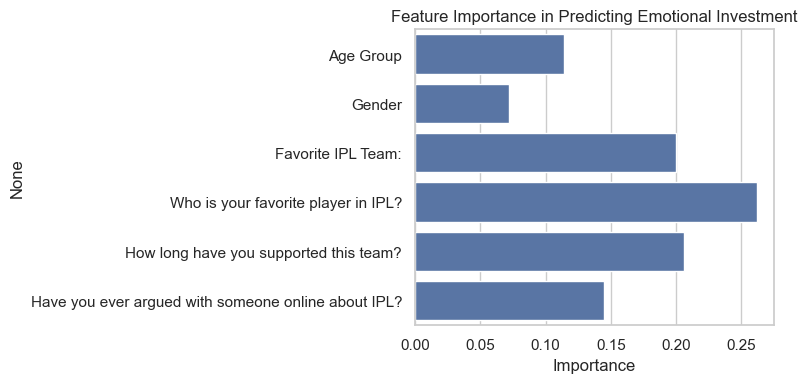

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_excel("Cleaned_IPL_Dataset2.xlsx")

# ---------------------------
# SELECTED FEATURES & TARGET
# ---------------------------
features = [
    "Age Group",
    "Gender",
    "Favorite IPL Team:",
    "Who is your favorite player in IPL?",
    "How long have you supported this team?",
    "Have you ever argued with someone online about IPL?"
]

target = "How emotionally invested are you in IPL? (Scale: 1 - Not at all, 5 - Very emotionally invested)"

# Filter the dataframe
df_model = df[features + [target]].dropna()

# ---------------------------
# ENCODE CATEGORICAL DATA
# ---------------------------
le_dict = {}
for col in features:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le  # Save encoders if needed later

# Target column (no encoding needed if it's numeric 1–5)
X = df_model[features]
y = df_model[target]

# ---------------------------
# TRAIN-TEST SPLIT
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# RANDOM FOREST MODEL
# ---------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# EVALUATION
# ---------------------------
y_pred = model.predict(X_test)
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature importance
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance in Predicting Emotional Investment")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()


In [11]:
target = "Favorite IPL Team:"

In [14]:
import pandas as pd

# Load cleaned data with sentiment scores and investment level
df = pd.read_csv("ipl_sentiment_with_labels.csv")

# Filter highly invested fans (e.g., investment level >= 4)
df_high = df[df["How emotionally invested are you in IPL? (Scale: 1 - Not at all, 5 - Very emotionally invested)"] >= 4]

# Group by team and calculate metrics
team_group = df.groupby("Favorite IPL Team:")

summary_df = team_group.agg({
    "How do you react when your team wins? [Score]": "mean",
    "How do you react when your team loses? [Score]": "mean",
    "How emotionally invested are you in IPL? (Scale: 1 - Not at all, 5 - Very emotionally invested)": "mean",
    "Have you ever argued with someone online about IPL?": lambda x: (x == "Yes").mean()  # % engaged
}).reset_index()

# Rename columns
summary_df.columns = [
    "Team", 
    "Avg Win Sentiment", 
    "Avg Loss Sentiment", 
    "Avg Investment", 
    "Social Engagement %"
]

# Combine metrics to create a custom score
summary_df["Team Sentiment Score"] = (
    0.4 * summary_df["Avg Win Sentiment"] +
    0.2 * summary_df["Avg Loss Sentiment"] +
    0.3 * (summary_df["Avg Investment"] / 5) +
    0.1 * summary_df["Social Engagement %"]
)

# Rank teams
summary_df["Predicted Rank"] = summary_df["Team Sentiment Score"].rank(ascending=False).astype(int)
summary_df = summary_df.sort_values("Predicted Rank")

# Display predicted rankings
print("🏆 Predicted Team Rankings Based on Fan Sentiment:\n")
print(summary_df[["Predicted Rank", "Team", "Team Sentiment Score"]])

🏆 Predicted Team Rankings Based on Fan Sentiment:

   Predicted Rank                         Team  Team Sentiment Score
4               1                 Punjab Kings              0.533420
6               2  Royal Challengers Bengaluru              0.449645
5               3             Rajasthan Royals              0.414205
3               4               Mumbai Indians              0.407495
2               5        Kolkata Knight Riders              0.406409
0               6          Chennai Super Kings              0.329287
1               7               Delhi Capitals              0.308063



🏆 Predicted Final Team Rankings Based on Fan Sentiment:

   Predicted Rank                         Team  Team Sentiment Score
4               1                 Punjab Kings              0.533420
3               2               Mumbai Indians              0.491212
2               3        Kolkata Knight Riders              0.476000
5               4  Royal Challengers Bengaluru              0.466060
0               5          Chennai Super Kings              0.419713
1               6               Delhi Capitals              0.410320


/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_50673/3411950387.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="Team", y="Team Sentiment Score", palette="coolwarm", order=grouped["Team"])


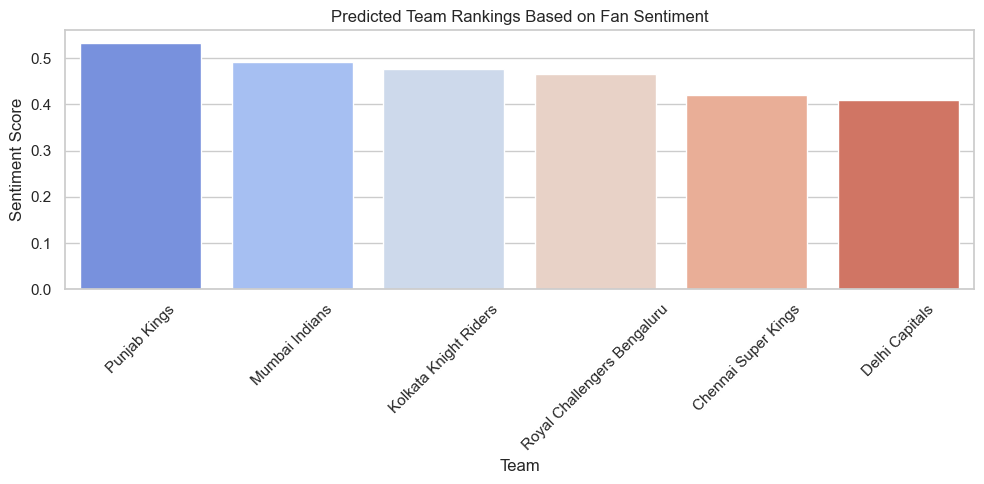

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV with sentiment scores already added
df = pd.read_csv("ipl_sentiment_with_labels.csv")

# Rename for convenience
investment_col = "How emotionally invested are you in IPL? (Scale: 1 - Not at all, 5 - Very emotionally invested)"
argue_col = "Have you ever argued with someone online about IPL?"
team_col = "Favorite IPL Team:"
win_sent_col = "How do you react when your team wins? [Score]"
loss_sent_col = "How do you react when your team loses? [Score]"

# Filter highly invested fans (optional but useful for more loyal opinions)
df_high = df[df[investment_col] >= 4]

# Group by team
grouped = df_high.groupby(team_col).agg({
    win_sent_col: 'mean',
    loss_sent_col: 'mean',
    investment_col: 'mean',
    argue_col: lambda x: (x == "Yes").mean()
}).reset_index()

# Rename columns for clarity
grouped.columns = [
    "Team",
    "Avg Win Sentiment",
    "Avg Loss Sentiment",
    "Avg Investment Level",
    "Social Media Engagement %"
]

# Calculate final team sentiment score
grouped["Team Sentiment Score"] = (
    0.4 * grouped["Avg Win Sentiment"] +
    0.2 * grouped["Avg Loss Sentiment"] +
    0.3 * (grouped["Avg Investment Level"] / 5) +  # normalize to 0-1
    0.1 * grouped["Social Media Engagement %"]
)

# Rank teams (1 = highest predicted rank)
grouped["Predicted Rank"] = grouped["Team Sentiment Score"].rank(ascending=False).astype(int)
grouped = grouped.sort_values("Predicted Rank")

# Show the final ranking table
print("\n🏆 Predicted Final Team Rankings Based on Fan Sentiment:\n")
print(grouped[["Predicted Rank", "Team", "Team Sentiment Score"]])

# Optional: Plot the ranking
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x="Team", y="Team Sentiment Score", palette="coolwarm", order=grouped["Team"])
plt.xticks(rotation=45)
plt.title("Predicted Team Rankings Based on Fan Sentiment")
plt.ylabel("Sentiment Score")
plt.tight_layout()
plt.savefig("predicted_team_rankings.png")
plt.show()

/Users/krishanggoel/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/matplotlib-4nz5azbs because there was an issue with the default path (/Users/krishanggoel/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.



✅ Enhanced team rankings saved as 'enhanced_team_rankings.csv'

   Predicted Rank                         Team  Team Sentiment Score
4               1                 Punjab Kings              0.600000
6               2  Royal Challengers Bengaluru              0.497750
2               3        Kolkata Knight Riders              0.482500
3               4               Mumbai Indians              0.446947
5               5             Rajasthan Royals              0.439565
0               6          Chennai Super Kings              0.378784
1               7               Delhi Capitals              0.259643


/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_57712/1183389867.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="Team", y="Team Sentiment Score", palette="viridis", order=grouped["Team"])
/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_57712/1183389867.py:101: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yw/0q8c8q252mg1tkj07mxpw0mr0000gn/T/ipykernel_57712/1183389867.py:102: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.savefig("predicted_team_rankings.png")
/Users/krishanggoel/Projects/SentimentAnalysis/SenAna/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


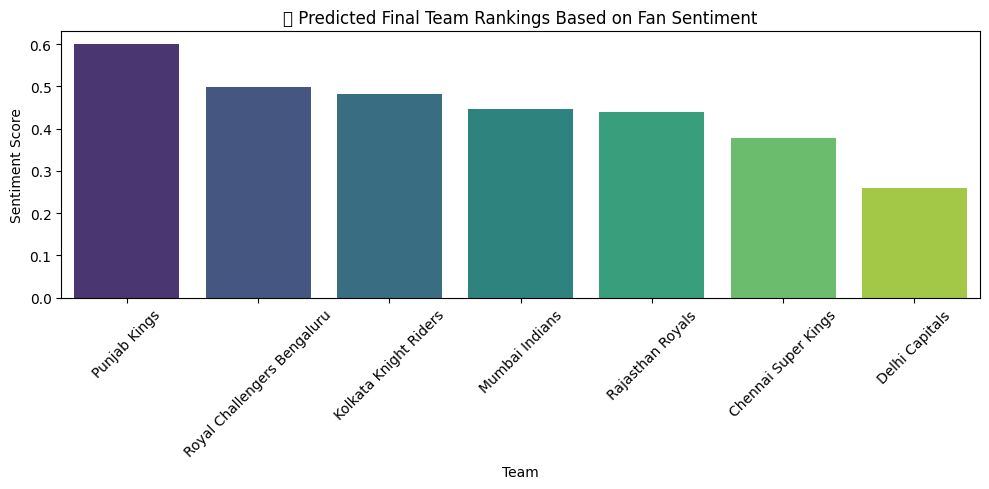

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Cleaned_IPL_Dataset2.csv")

# ----------------------------
# STEP 1: Create numeric features
# ----------------------------

# Map support duration
support_map = {
    "<1 Year": 0.5,
    "1-3 Years": 2,
    "3-5 Years": 4,
    "Since the beginning of IPL": 10
}
df["Support Duration (Years)"] = df["How long have you supported this team?"].map(support_map)

# Binary flags
df["Attended Stadium"] = df["Have you ever attended an IPL match in a stadium?"].apply(lambda x: 1 if x == "Yes" else 0)
df["Watches Full Matches"] = df["How do you usually watch IPL?"].apply(lambda x: 1 if "Streaming" in str(x) or "TV" in str(x) else 0)
df["Believes Bias"] = df["Do you think umpires are biased against certain teams?"].apply(lambda x: 1 if x == "Yes" else 0)
df["Active Social Media"] = df["How often do you engage in social media discussions after matches?"].apply(
    lambda x: 1 if str(x) in ["Always", "Often"] else 0)
df["Thinks Team Will Win"] = (df["Which team do you think will win IPL this year?"] == df["Favorite IPL Team:"]).astype(int)

# Sentiment scores (if available from previous steps)
try:
    df["Win Sentiment Score"] = df["How do you react when your team wins? [Score]"]
    df["Loss Sentiment Score"] = df["How do you react when your team loses? [Score]"]
except:
    df["Win Sentiment Score"] = 0
    df["Loss Sentiment Score"] = 0

# Loyalty metric
df["Loyal to Team"] = df["Would you continue supporting your team if your favorite player left?"].apply(lambda x: 1 if x == "Yes" else 0)

# ----------------------------
# STEP 2: Group by Team
# ----------------------------
grouped = df.groupby("Favorite IPL Team:").agg({
    "Support Duration (Years)": "mean",
    "Attended Stadium": "mean",
    "Watches Full Matches": "mean",
    "Believes Bias": "mean",
    "Active Social Media": "mean",
    "Thinks Team Will Win": "mean",
    "Win Sentiment Score": "mean",
    "Loss Sentiment Score": "mean",
    "How emotionally invested are you in IPL? (Scale: 1 - Not at all, 5 - Very emotionally invested)": "mean",
    "Loyal to Team": "mean"
}).reset_index()

# Rename for clarity
grouped.columns = [
    "Team", "Avg Support Duration", "Attended Stadium %",
    "Watches Full Matches %", "Believes Bias %",
    "Social Media Engagement %", "Confidence to Win %",
    "Avg Win Sentiment", "Avg Loss Sentiment",
    "Avg Investment", "Loyalty %"
]

# ----------------------------
# STEP 3: Compute Final Team Score
# ----------------------------
grouped["Team Sentiment Score"] = (
    0.2 * grouped["Avg Win Sentiment"] +
    0.1 * grouped["Avg Loss Sentiment"] +
    0.2 * (grouped["Avg Investment"] / 5) +
    0.1 * grouped["Loyalty %"] +
    0.1 * grouped["Confidence to Win %"] +
    0.05 * grouped["Attended Stadium %"] +
    0.05 * grouped["Watches Full Matches %"] +
    0.1 * grouped["Social Media Engagement %"] +
    0.1 * (grouped["Avg Support Duration"] / 10)
)

# ----------------------------
# STEP 4: Ranking & Save
# ----------------------------
grouped["Predicted Rank"] = grouped["Team Sentiment Score"].rank(ascending=False).astype(int)
grouped = grouped.sort_values("Predicted Rank")

# Save CSV
grouped.to_csv("enhanced_team_rankings.csv", index=False)
print("\n✅ Enhanced team rankings saved as 'enhanced_team_rankings.csv'\n")

# Display table
print(grouped[["Predicted Rank", "Team", "Team Sentiment Score"]])

# ----------------------------
# STEP 5: Plot the Rankings
# ----------------------------
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x="Team", y="Team Sentiment Score", palette="viridis", order=grouped["Team"])
plt.xticks(rotation=45)
plt.title("🏆 Predicted Final Team Rankings Based on Fan Sentiment")
plt.ylabel("Sentiment Score")
plt.tight_layout()
plt.savefig("predicted_team_rankings.png")
plt.show()